In [170]:
import pandas as pd
import numpy as np

from pandas import DataFrame

import matplotlib.pyplot as plt
import seaborn as sns

#imports for MongoDB
from pymongo import MongoClient
import pymongo as pym
import pandas as pd
import csv
import json

from bson.code import Code

#import plotly for interactive graphs
import plotly.express as px 

#import Altar for interactive plots
import altair as alt 

import re
import warnings

#Libarys for Sentiment Analysis
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk.tokenize import RegexpTokenizer

#Libary for Autoregressive model
from statsmodels.tsa.ar_model import AutoReg, ar_select_order
from statsmodels.tsa.arima.model import ARIMA

#Plot PACF function
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf

#Auto ARIMA for paramanter tuning
#from pmdarima.arima import auto_arima
import pmdarima as pm

#import plotly for interactive graphs
import plotly.express as px 


In [171]:
#Display option to see more columns. Usefull to see all the columns of Dummy variables for Machine Learning
pd.set_option('display.max_columns', 120)

#make the charts look better for displays with retina resolution 
%config InlineBackend.figure_format = 'retina'

In [172]:
pd.set_option('display.max_rows', None)

In [173]:
warnings.filterwarnings("ignore")

### Read in data and basic data processing


In [174]:
#Creating a pymongo client
mongo_client = MongoClient('localhost', 27017)

#Read form Mongodb to a dataframe
db = mongo_client['GoT']
collection = db['twitter']
item_details = collection.find()

GoT_df = DataFrame(item_details)

In [175]:
GoT_df.head()

,_id,poster,recipient,relationship,tweet date,tweet id,tweet,hashtags,retweet status
0,646e30388ceec2571c6ce6c9,Macready1306,Macready1306,tweet,Wed Jun 01 06:35:56 +0000 2016,737895438624423937,I've never watched #GameOfThrones so I'd love ...,['gameofthrones'],False
1,646e30388ceec2571c6ce6ca,wahanapenulis,wahanapenulis,tweet,Wed Jun 01 06:38:50 +0000 2016,737896168445870080,I'm Tyrion. Discover which #GameOfThrones char...,['gameofthrones'],False
2,646e30388ceec2571c6ce6cb,scopece_marco,EmiliaClarkeNet,mentions,Wed Jun 01 06:44:16 +0000 2016,737897535788961792,RT @EmiliaClarkeNet: (Video) Emilia Clarke on ...,['gameofthrones'],True
3,646e30388ceec2571c6ce6cc,scopece_marco,emiliaclarke,mentions,Wed Jun 01 06:44:16 +0000 2016,737897535788961792,RT @EmiliaClarkeNet: (Video) Emilia Clarke on ...,['gameofthrones'],True
4,646e30388ceec2571c6ce6cd,Yayahemo,GoT_Tyrion,mentions,Wed Jun 01 06:46:08 +0000 2016,737898005542674432,RT @GoT_Tyrion: Who would do this?? #GameofThr...,['gameofthrones'],True


In [176]:
GoT_df.isnull().sum()

_id               0
poster            0
recipient         0
relationship      0
tweet date        0
tweet id          0
tweet             0
hashtags          0
retweet status    0
dtype: int64

In [177]:
#convert to date and get rid of time stamp on date
GoT_df['tweet date'] = pd.to_datetime(GoT_df['tweet date'])
GoT_df['date'] = GoT_df['tweet date'].dt.date


In [178]:
GoT_df.head()

,_id,poster,recipient,relationship,tweet date,tweet id,tweet,hashtags,retweet status,date
0,646e30388ceec2571c6ce6c9,Macready1306,Macready1306,tweet,2016-06-01 06:35:56+00:00,737895438624423937,I've never watched #GameOfThrones so I'd love ...,['gameofthrones'],False,2016-06-01
1,646e30388ceec2571c6ce6ca,wahanapenulis,wahanapenulis,tweet,2016-06-01 06:38:50+00:00,737896168445870080,I'm Tyrion. Discover which #GameOfThrones char...,['gameofthrones'],False,2016-06-01
2,646e30388ceec2571c6ce6cb,scopece_marco,EmiliaClarkeNet,mentions,2016-06-01 06:44:16+00:00,737897535788961792,RT @EmiliaClarkeNet: (Video) Emilia Clarke on ...,['gameofthrones'],True,2016-06-01
3,646e30388ceec2571c6ce6cc,scopece_marco,emiliaclarke,mentions,2016-06-01 06:44:16+00:00,737897535788961792,RT @EmiliaClarkeNet: (Video) Emilia Clarke on ...,['gameofthrones'],True,2016-06-01
4,646e30388ceec2571c6ce6cd,Yayahemo,GoT_Tyrion,mentions,2016-06-01 06:46:08+00:00,737898005542674432,RT @GoT_Tyrion: Who would do this?? #GameofThr...,['gameofthrones'],True,2016-06-01


In [179]:
missing_dates = GoT_df.copy()

#find any missing dates
missing_dates = missing_dates.set_index('date')
print(pd.date_range(start='2016-01-01', end='2016-12-31').difference(missing_dates.index))


DatetimeIndex(['2016-02-11', '2016-02-12', '2016-02-13', '2016-02-28',
               '2016-02-29', '2016-03-05', '2016-03-06', '2016-03-07',
               '2016-06-03', '2016-06-04', '2016-06-05', '2016-06-06'],
              dtype='datetime64[ns]', freq=None)


In [180]:
GoT_df.head()

,_id,poster,recipient,relationship,tweet date,tweet id,tweet,hashtags,retweet status,date
0,646e30388ceec2571c6ce6c9,Macready1306,Macready1306,tweet,2016-06-01 06:35:56+00:00,737895438624423937,I've never watched #GameOfThrones so I'd love ...,['gameofthrones'],False,2016-06-01
1,646e30388ceec2571c6ce6ca,wahanapenulis,wahanapenulis,tweet,2016-06-01 06:38:50+00:00,737896168445870080,I'm Tyrion. Discover which #GameOfThrones char...,['gameofthrones'],False,2016-06-01
2,646e30388ceec2571c6ce6cb,scopece_marco,EmiliaClarkeNet,mentions,2016-06-01 06:44:16+00:00,737897535788961792,RT @EmiliaClarkeNet: (Video) Emilia Clarke on ...,['gameofthrones'],True,2016-06-01
3,646e30388ceec2571c6ce6cc,scopece_marco,emiliaclarke,mentions,2016-06-01 06:44:16+00:00,737897535788961792,RT @EmiliaClarkeNet: (Video) Emilia Clarke on ...,['gameofthrones'],True,2016-06-01
4,646e30388ceec2571c6ce6cd,Yayahemo,GoT_Tyrion,mentions,2016-06-01 06:46:08+00:00,737898005542674432,RT @GoT_Tyrion: Who would do this?? #GameofThr...,['gameofthrones'],True,2016-06-01


In [181]:
# Drop columns. Only interested in tweet text and date
#GoT_df.drop(['Unnamed: 0','poster','recipient','relationship','tweet date','tweet id','hashtags','retweet status'], axis=1,inplace=True)

GoT_df.drop(['_id','poster','recipient','relationship','tweet date','tweet id','hashtags','retweet status'], axis=1,inplace=True)


In [182]:
GoT_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133585 entries, 0 to 133584
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   tweet   133585 non-null  object
 1   date    133585 non-null  object
dtypes: object(2)
memory usage: 2.0+ MB


### Sentiment Analysis

In [183]:
analyzer = SentimentIntensityAnalyzer()

GoT_df['polarity'] = GoT_df['tweet'].apply(lambda x: analyzer.polarity_scores(x))
GoT_df.head()

,tweet,date,polarity
0,I've never watched #GameOfThrones so I'd love ...,2016-06-01,"{'neg': 0.0, 'neu': 0.641, 'pos': 0.359, 'comp..."
1,I'm Tyrion. Discover which #GameOfThrones char...,2016-06-01,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
2,RT @EmiliaClarkeNet: (Video) Emilia Clarke on ...,2016-06-01,"{'neg': 0.136, 'neu': 0.864, 'pos': 0.0, 'comp..."
3,RT @EmiliaClarkeNet: (Video) Emilia Clarke on ...,2016-06-01,"{'neg': 0.136, 'neu': 0.864, 'pos': 0.0, 'comp..."
4,RT @GoT_Tyrion: Who would do this?? #GameofThr...,2016-06-01,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."


In [184]:
# Change df structure to have pos, neg and neu columns
GoT_df = pd.concat(
    [GoT_df.drop(['polarity'], axis=1), 
     GoT_df['polarity'].apply(pd.Series)], axis=1)
GoT_df.head()

,tweet,date,neg,neu,pos,compound
0,I've never watched #GameOfThrones so I'd love ...,2016-06-01,0.000,0.641,0.359,0.8771
1,I'm Tyrion. Discover which #GameOfThrones char...,2016-06-01,0.000,1.000,0.000,0.0000
2,RT @EmiliaClarkeNet: (Video) Emilia Clarke on ...,2016-06-01,0.136,0.864,0.000,-0.2960
3,RT @EmiliaClarkeNet: (Video) Emilia Clarke on ...,2016-06-01,0.136,0.864,0.000,-0.2960
4,RT @GoT_Tyrion: Who would do this?? #GameofThr...,2016-06-01,0.000,1.000,0.000,0.0000


In [185]:
# Change df structure to have sentiment column
GoT_df['sentiment'] = GoT_df['compound'].apply(lambda x: 'positive' if x >0 else 'neutral' if x==0 else 'negative')
GoT_df.head()

,tweet,date,neg,neu,pos,compound,sentiment
0,I've never watched #GameOfThrones so I'd love ...,2016-06-01,0.000,0.641,0.359,0.8771,positive
1,I'm Tyrion. Discover which #GameOfThrones char...,2016-06-01,0.000,1.000,0.000,0.0000,neutral
2,RT @EmiliaClarkeNet: (Video) Emilia Clarke on ...,2016-06-01,0.136,0.864,0.000,-0.2960,negative
3,RT @EmiliaClarkeNet: (Video) Emilia Clarke on ...,2016-06-01,0.136,0.864,0.000,-0.2960,negative
4,RT @GoT_Tyrion: Who would do this?? #GameofThr...,2016-06-01,0.000,1.000,0.000,0.0000,neutral


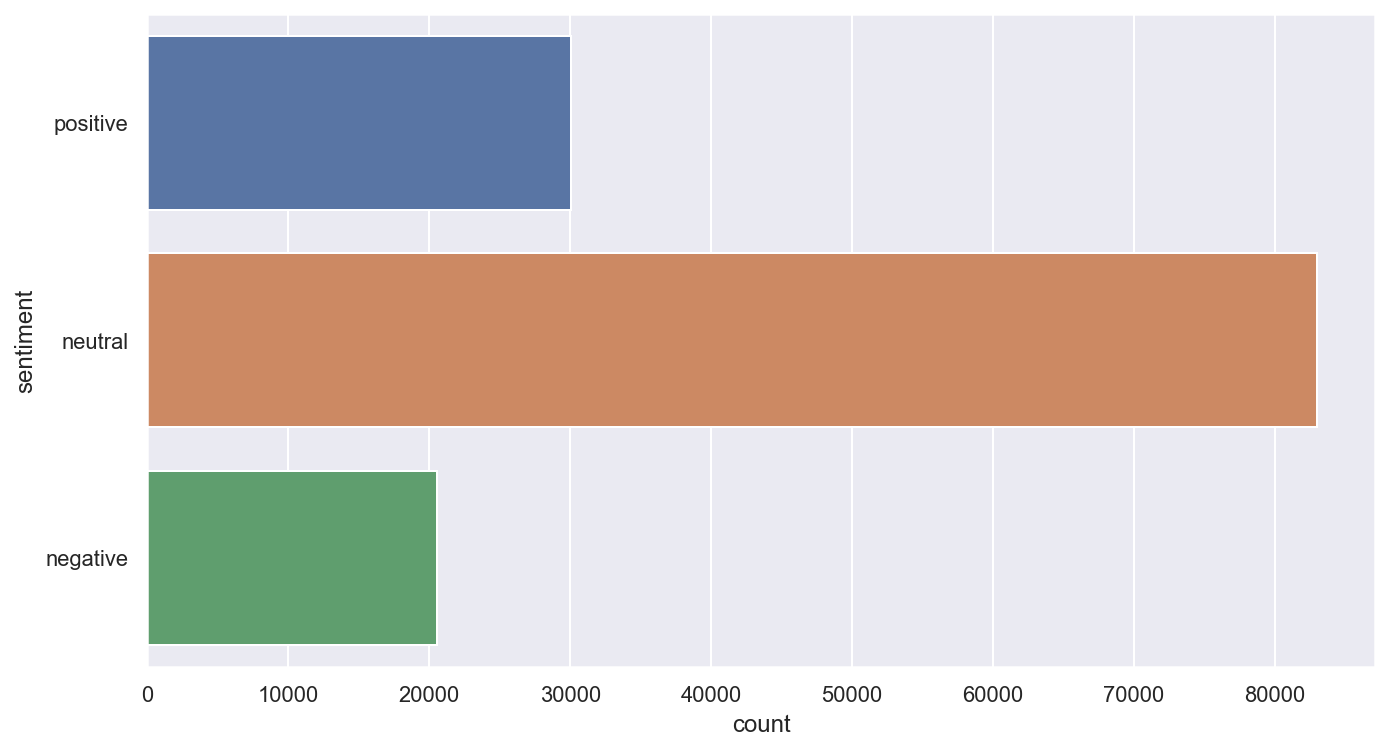

In [186]:
# Number of tweets per sentiment
sns.countplot(y='sentiment', 
             data=GoT_df, 
             );

In [187]:
#Fing how mant of each
print(GoT_df['sentiment'].value_counts()['positive'])
print(GoT_df['sentiment'].value_counts()['negative'])
print(GoT_df['sentiment'].value_counts()['neutral'])

30059
20564
82962


In [188]:
# Drop columns. Only interested in sentiment and date
GoT_df.drop(['tweet','neg','neu','pos','compound'], axis=1,inplace=True)
GoT_df.head()

,date,sentiment
0,2016-06-01,positive
1,2016-06-01,neutral
2,2016-06-01,negative
3,2016-06-01,negative
4,2016-06-01,neutral


In [189]:
# Get 2 dataframes for pos, neg 
# Will not be interested in neu
GoT_positive = GoT_df.loc[GoT_df['sentiment'] == 'positive']
GoT_negative = GoT_df.loc[GoT_df['sentiment'] == 'negative']
GoT_neutral = GoT_df.loc[GoT_df['sentiment'] == 'neutral']

In [190]:
pos = GoT_positive.groupby('date', as_index=False).count()
neg = GoT_negative.groupby('date', as_index=False).count()
neut = GoT_neutral.groupby('date', as_index=False).count()

#### Missing Data

In [191]:
# Add in missing dates into the dataframe with 0 as sentiment values

pos = pos.set_index('date')
neg = neg.set_index('date')
neut = neut.set_index('date')

# Date Range
idx = pd.date_range('01-01-2016', '12-31-2016')

#reindex with 0 in sentiment values
pos = pos.reindex(idx, fill_value=0)
neg = neg.reindex(idx, fill_value=0)
neut = neut.reindex(idx, fill_value=0)

#reset index to sequence
pos = pos.rename_axis('date').reset_index()
neg = neg.rename_axis('date').reset_index()
neut = neut.rename_axis('date').reset_index()

In [192]:
#replace 0's with previous value
pos['sentiment'] = pos['sentiment'].replace(to_replace=0, method='ffill')
neg['sentiment'] = neg['sentiment'].replace(to_replace=0, method='ffill')
neut['sentiment'] = neut['sentiment'].replace(to_replace=0, method='ffill')

In [193]:
#for viewing dates replace with average of viewing date week behind
# 03-June replace with 27-may
# 04-June replace with 28-may
# 05-June replace with 29-may
# 06-June replace with 30-may

pos.at[154, 'sentiment'] = 82
pos.at[155, 'sentiment'] = 90
pos.at[156, 'sentiment'] = 179
pos.at[157, 'sentiment'] = 739

neg.at[154, 'sentiment'] = 42
neg.at[155, 'sentiment'] = 43
neg.at[156, 'sentiment'] = 79
neg.at[157, 'sentiment'] = 603

neut.at[154, 'sentiment'] = 168
neut.at[155, 'sentiment'] = 230
neut.at[156, 'sentiment'] = 429
neut.at[157, 'sentiment'] = 1905

In [194]:
#pos.loc[62.5] = ['2016-06-03', 64]
#pos.loc[62.6] = ['2016-06-04', 77]
#pos.loc[62.7] = ['2016-06-05', 125]
#pos.loc[62.8] = ['2016-06-06', 732]
#pos = pos.sort_index().reset_index(drop=True)

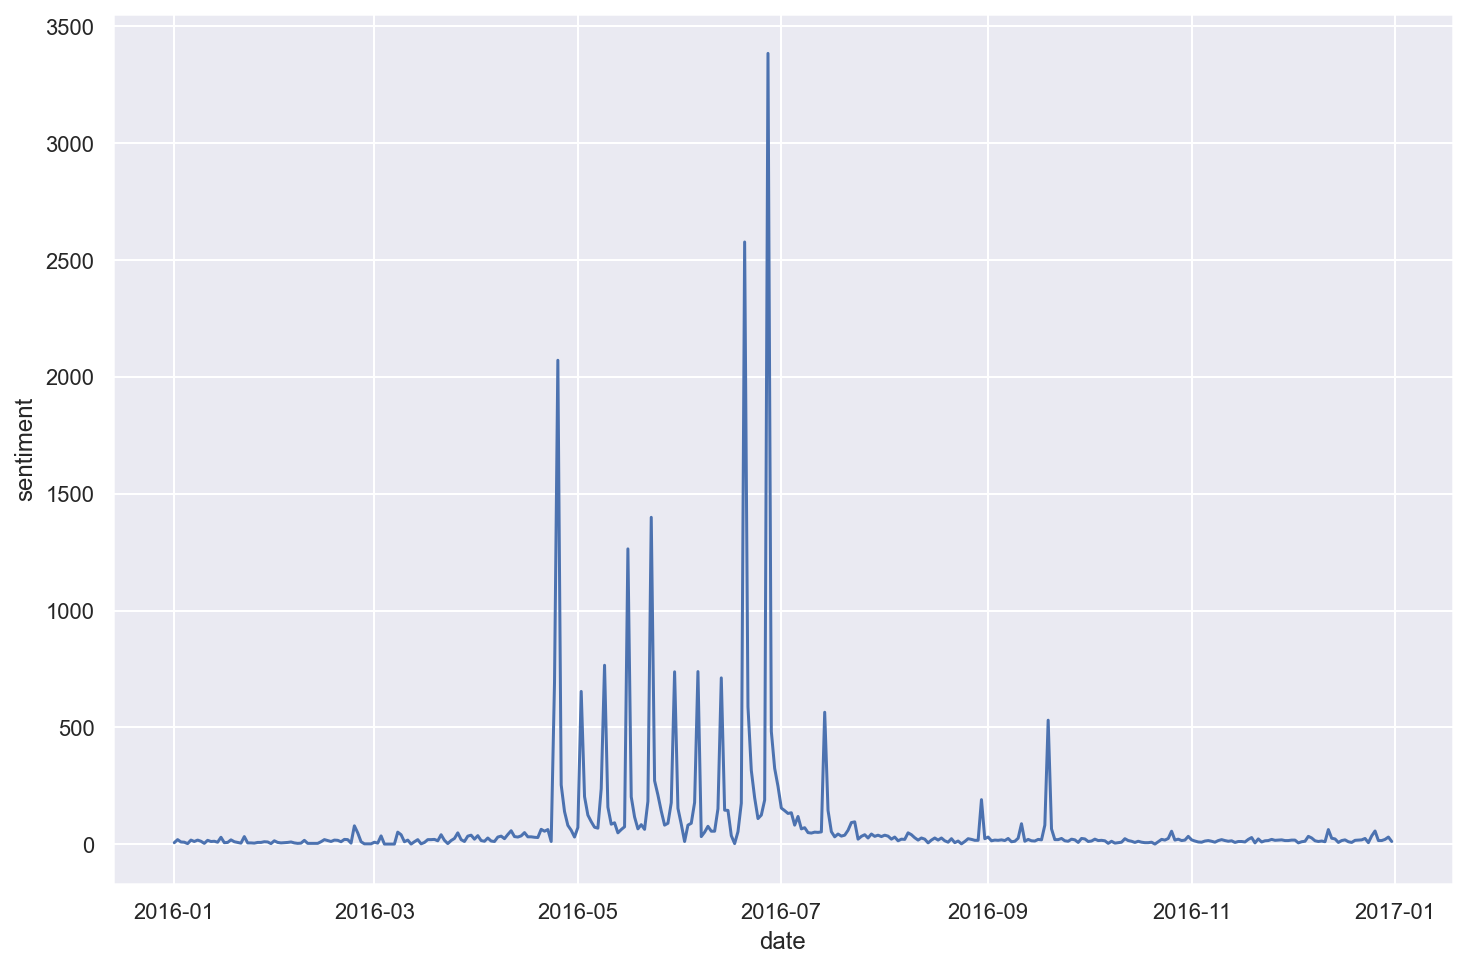

In [195]:
#Graph of positive sentiment over time

sns.set(rc = {'figure.figsize':(12,8)})
sns.set(font_scale=1)
myfig = sns.lineplot(x = 'date', y = 'sentiment', data = pos)
plt.show()

### Time Series

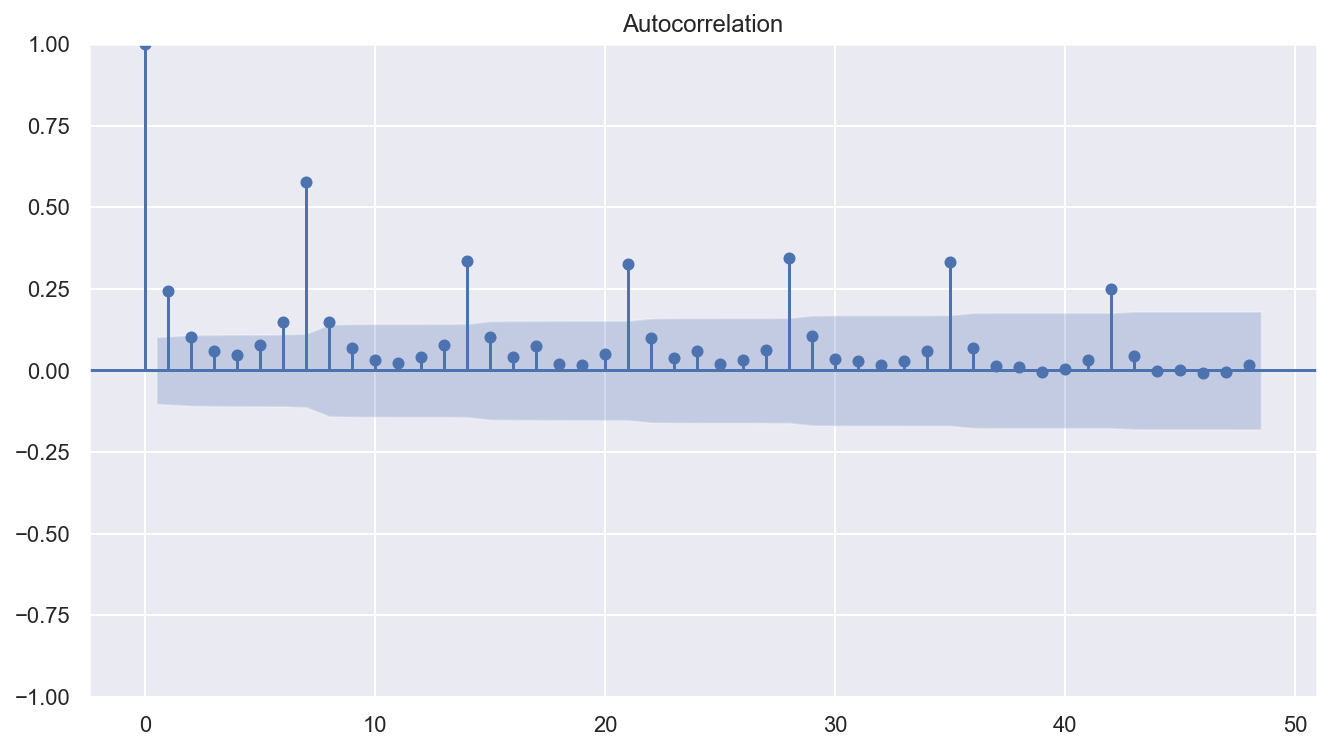

In [196]:
#Plot of  Autocorrelation for Positive sentiment
sns.set(rc = {'figure.figsize':(11,6)})
sns.set(font_scale=1)
acf_plot = plot_acf(pos['sentiment'], lags =48)

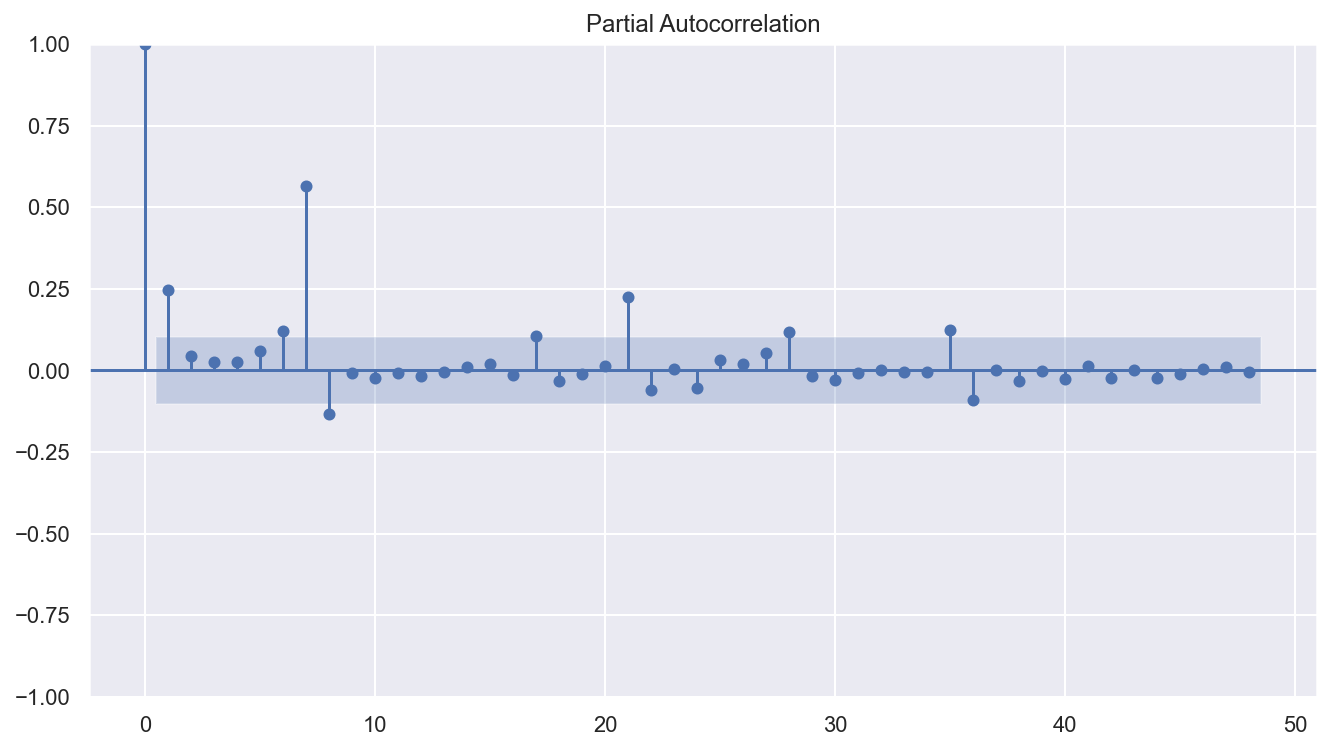

In [197]:
#Plot of Partial Autocorrelation for Positive sentiment
sns.set(rc = {'figure.figsize':(11,6)})
sns.set(font_scale=1)
pacf_plot = plot_pacf(pos['sentiment'], lags =48)

### Autoregression 

#### Test data for three Months (Oct, Nov, Dec)

In [198]:
#copy pos df
autoregression = pos.copy()

#Drop date column 
autoregression.drop(['date'], axis=1,inplace=True)

In [199]:

# train of 275 days and test of last 90 days of year
train = autoregression[0:275]
test = autoregression[275:365]

#Convert dataframes to a series  
train = train.squeeze()
test = test.squeeze()

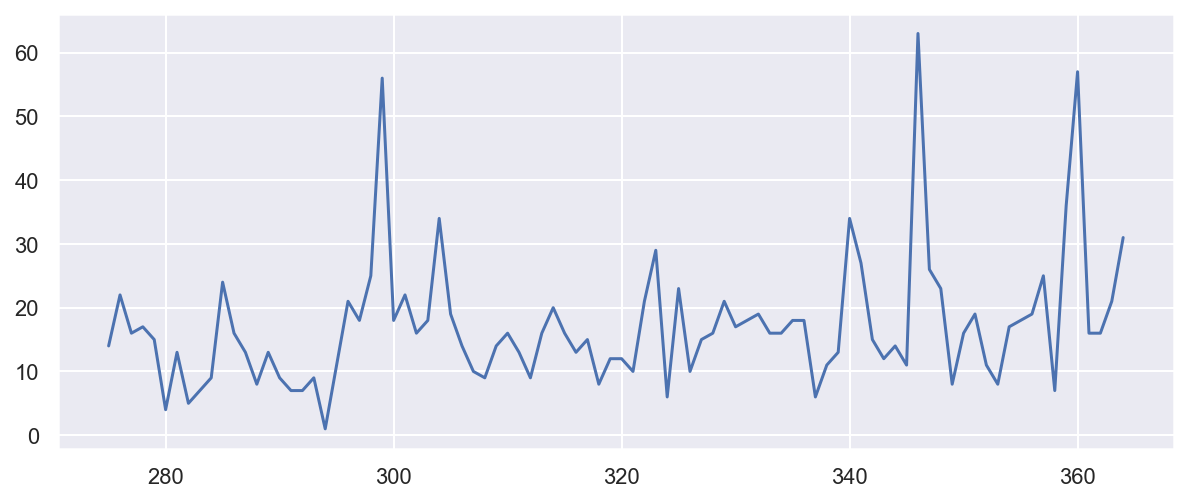

In [200]:
#Plot the test data pattern
plt.figure(figsize=(10,4))
sns.set(font_scale=1)
plt.plot(test)

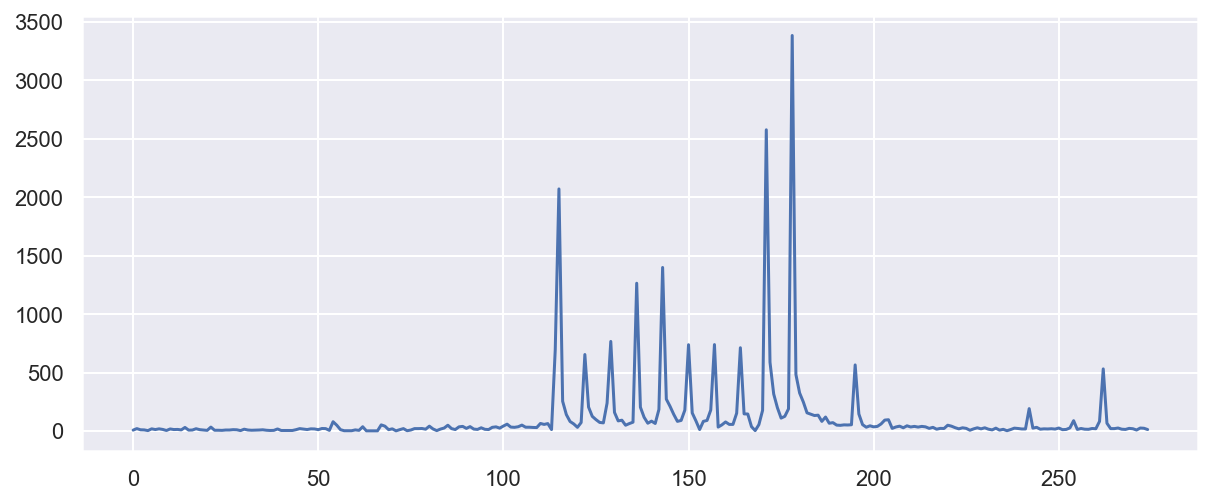

In [201]:
#Plot the training data pattern
plt.figure(figsize=(10,4))
sns.set(font_scale=1)
plt.plot(train)

In [202]:
#Run the AutoReg function with 28 lags
model = AutoReg(train, 28)

#Estimate the model parameters 
modelFit = model.fit()

#Print Model Results
print(modelFit.summary())

                            AutoReg Model Results                             
Dep. Variable:              sentiment   No. Observations:                  275
Model:                    AutoReg(28)   Log Likelihood               -1724.565
Method:               Conditional MLE   S.D. of innovations            260.631
Date:                Thu, 25 May 2023   AIC                           3509.130
Time:                        09:11:19   BIC                           3614.411
Sample:                            28   HQIC                          3551.517
                                  275                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            28.4585     22.802      1.248      0.212     -16.232      73.149
sentiment.L1      0.2319      0.063      3.666      0.000       0.108       0.356
sentiment.L2      0.0079      0.065     

In [203]:
#Examine accuracy of model
#Set parameters for start and end predictions
predictionStart = test.index[0]
predictionEnd = test.index[-1]

#Call the model to make predictions
predictions = modelFit.predict(start=predictionStart, end=predictionEnd)

#Difference between test and predictions
residuals = test - predictions

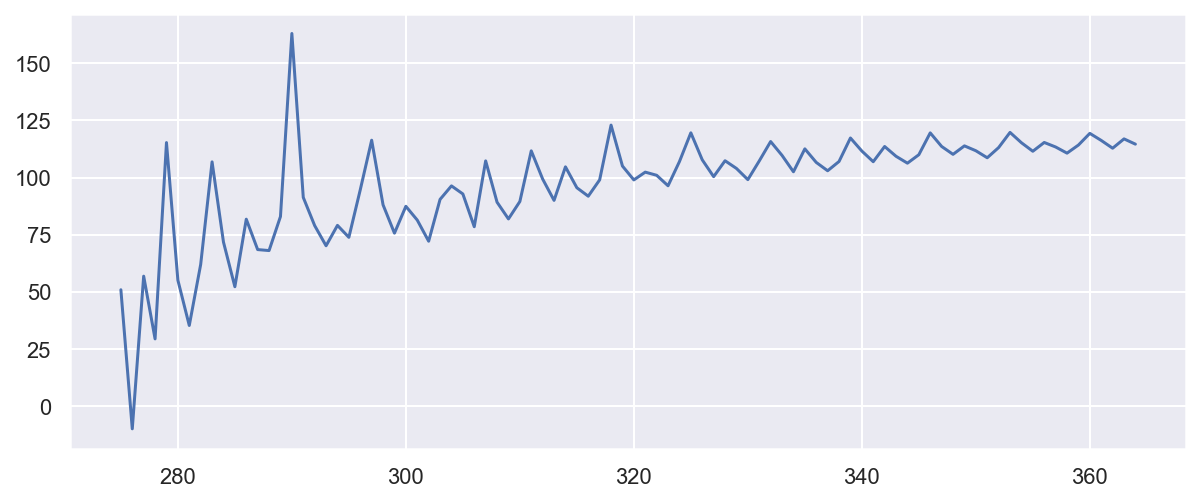

In [204]:
#Plot the pattern of the predictions
plt.figure(figsize=(10,4))
sns.set(font_scale=1)
plt.plot(predictions)

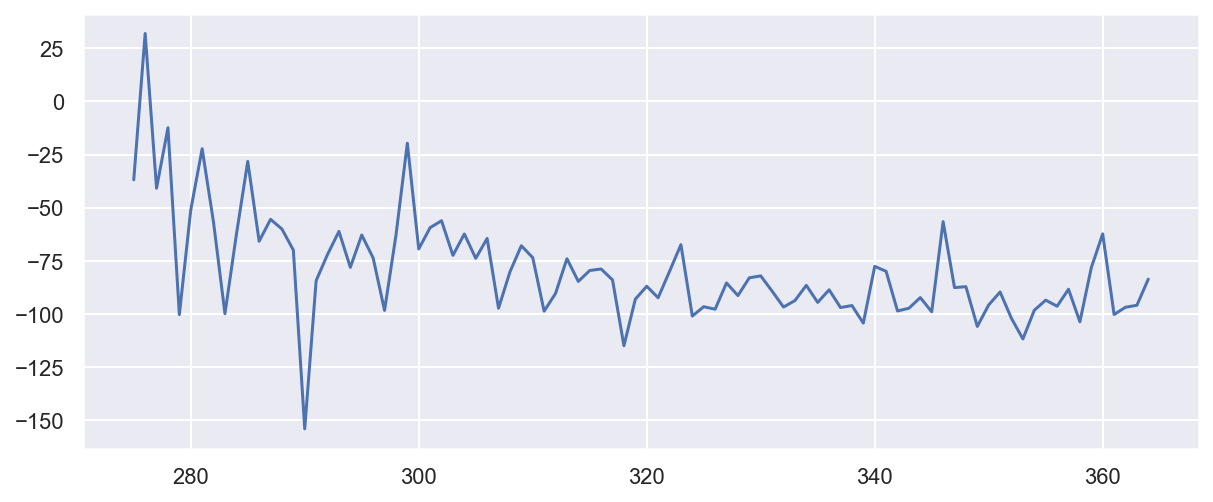

In [205]:
#Plot the pattern of the residuals
plt.figure(figsize=(10,4))
sns.set(font_scale=1)
plt.plot(residuals)

Text(0, 0.5, 'Positive Sentiment')

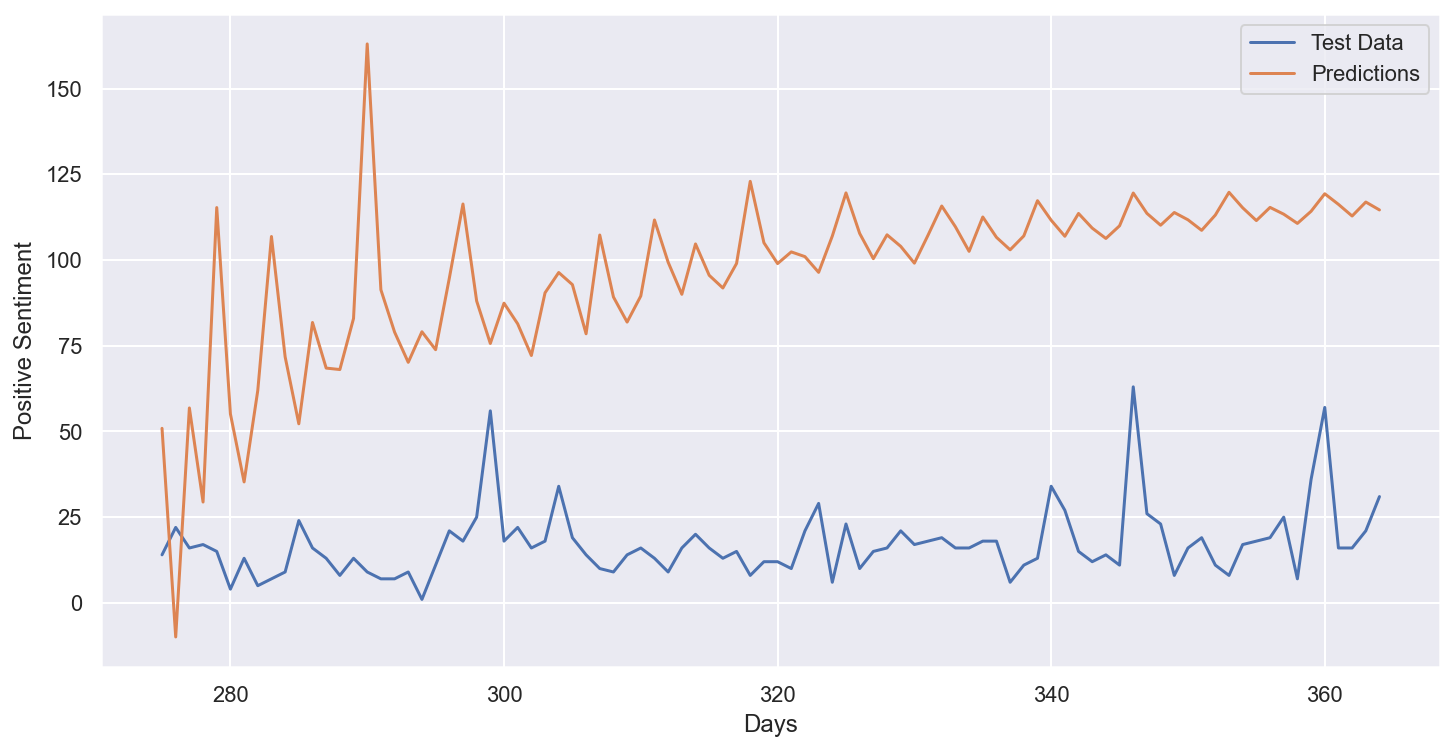

In [206]:
#Plot the graph of the Test Data vs Predictions 
plt.figure(figsize=(12,6))
#sns.set(font_scale=1)

plt.plot(test)
plt.plot(predictions)
plt.legend(('Test Data','Predictions'))
plt.xlabel("Days")
plt.ylabel("Positive Sentiment")

In [207]:
#Calculate Root Mean Squared error
print(f'Root Mean Squared error is: {round(np.sqrt(np.mean(residuals**2)),2)}')

Root Mean Squared error is: 83.36


#### Test data for one Month April

In [208]:
#copy pos df
autoregression = pos.copy()

#Drop date column 
autoregression.drop(['date'], axis=1,inplace=True)



In [209]:
# train test with train of 90 days
# for test of 30 days
train = autoregression[0:90]
test = autoregression[90:120]



In [210]:
#Convert dataframes to a series  
train = train.squeeze()
test = test.squeeze()

In [211]:


#Run the AutoReg function with 35 lags
model = AutoReg(train, 35)

#Estimate the model parameters 
modelFit = model.fit()

#Print Model Results
print(modelFit.summary())



                            AutoReg Model Results                             
Dep. Variable:              sentiment   No. Observations:                   90
Model:                    AutoReg(35)   Log Likelihood                -205.623
Method:               Conditional MLE   S.D. of innovations             10.172
Date:                Thu, 25 May 2023   AIC                            485.246
Time:                        09:11:20   BIC                            559.518
Sample:                            35   HQIC                           513.968
                                   90                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             1.6973      6.960      0.244      0.807     -11.945      15.339
sentiment.L1      0.4135      0.133      3.115      0.002       0.153       0.674
sentiment.L2     -0.1728      0.143     

In [212]:
#Examine accuracy of model
#Set parameters for start and end predictions
predictionStart = test.index[0]
predictionEnd = test.index[-1]

#Call the model to make predictions
predictions = modelFit.predict(start=predictionStart, end=predictionEnd)

#Difference between test and predictions
residuals = test - predictions

Text(0, 0.5, 'Positive Sentiment')

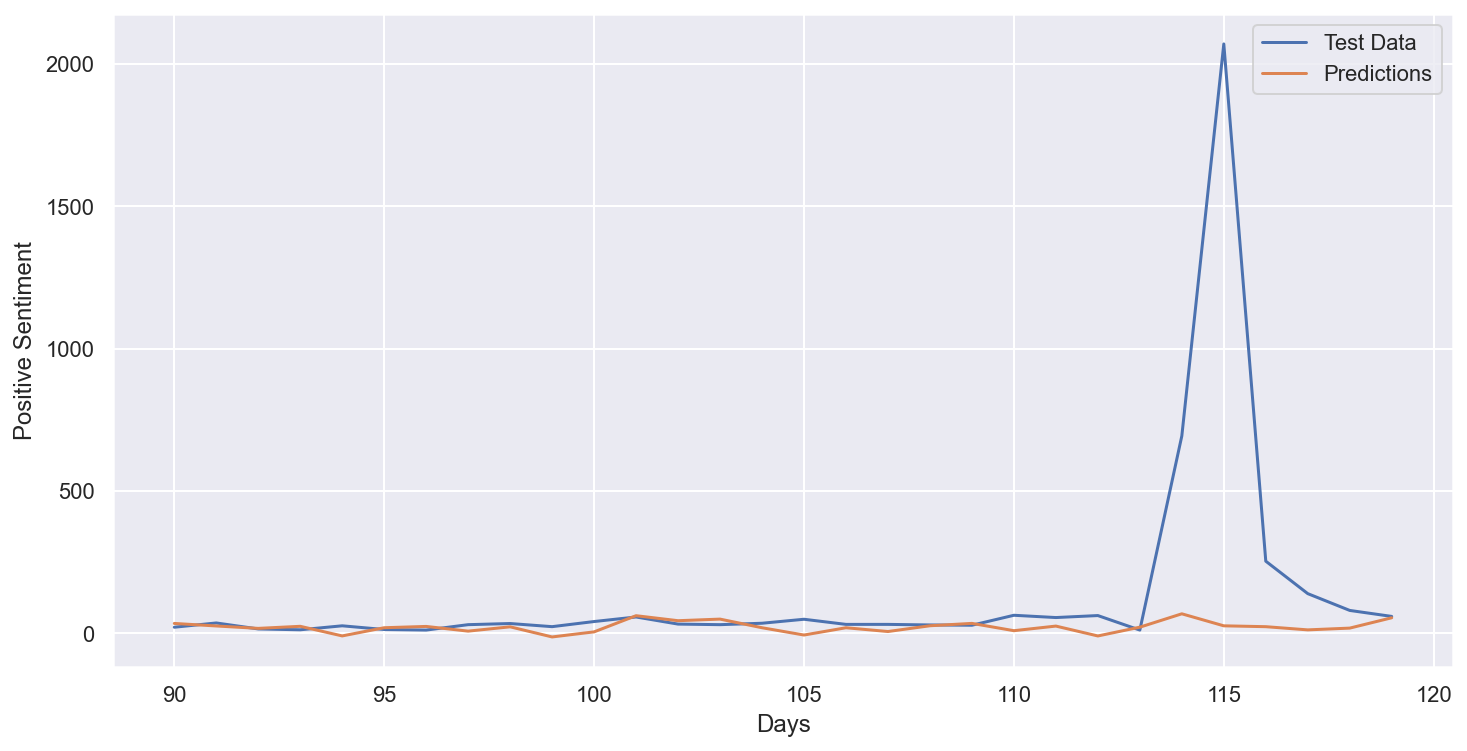

In [213]:
#Plot the graph of the Test Data vs Predictions 
plt.figure(figsize=(12,6))
#sns.set(font_scale=1)

plt.plot(test)
plt.plot(predictions)
plt.legend(('Test Data','Predictions'))
plt.xlabel("Days")
plt.ylabel("Positive Sentiment")

In [214]:
#Calculate Root Mean Squared error
print(f'Root Mean Squared error is: {round(np.sqrt(np.mean(residuals**2)),2)}')

Root Mean Squared error is: 394.15


#### Test data for one Month December

In [215]:
#copy pos df
autoregression = pos.copy()

#Drop date column 
autoregression.drop(['date'], axis=1,inplace=True)


# get dataframe with dat period we are testing for
data_slice = autoregression[245:366]

#We want each index to start from 0 for AutoReg function
data_slice.reset_index(drop=True, inplace=True)

# train test with train of 90 days
# for test of 30 days

train = data_slice[0:90]
test = data_slice[90:121]

#Convert dataframes to a series  
train = train.squeeze()
test = test.squeeze()


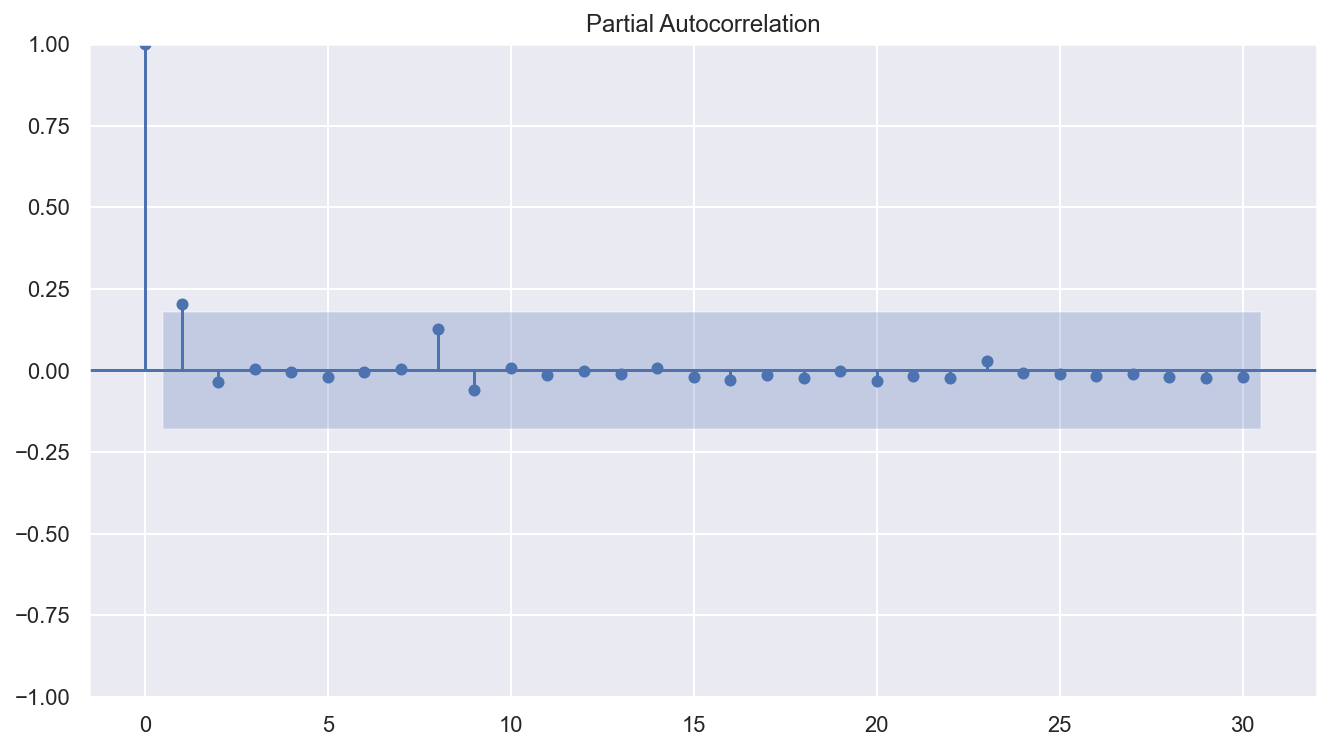

In [216]:
#Plot of Partial Autocorrelation for Positive sentiment
#Looking at end of year

sns.set(rc = {'figure.figsize':(11,6)})
sns.set(font_scale=1)
pacf_plot = plot_pacf(data_slice['sentiment'], lags =30)

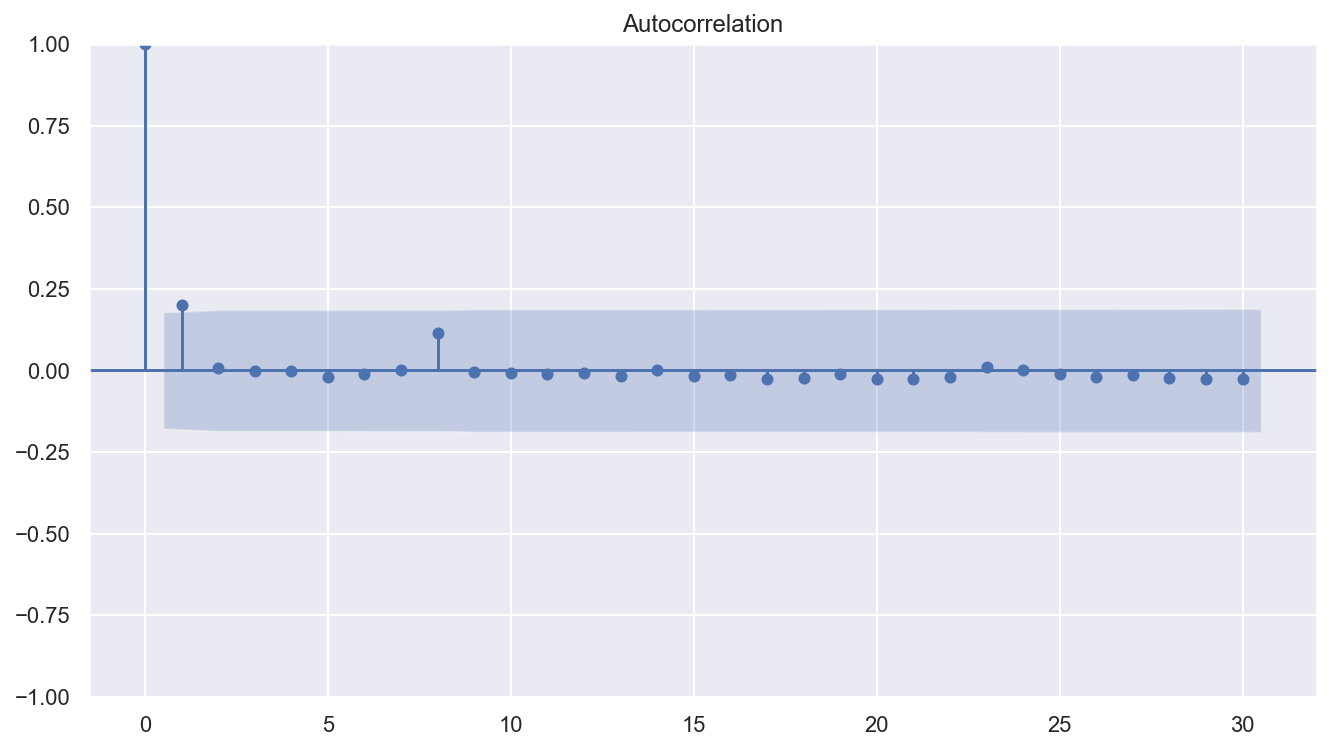

In [217]:
sns.set(rc = {'figure.figsize':(11,6)})
sns.set(font_scale=1)
acf_plot = plot_acf(data_slice['sentiment'], lags =30)

In [218]:
#Run the AutoReg function with 1 lag
model = AutoReg(train, 1)

#Estimate the model parameters 
modelFit = model.fit()

#Print Model Results
print(modelFit.summary())


                            AutoReg Model Results                             
Dep. Variable:              sentiment   No. Observations:                   90
Model:                     AutoReg(1)   Log Likelihood                -482.197
Method:               Conditional MLE   S.D. of innovations             54.544
Date:                Thu, 25 May 2023   AIC                            970.394
Time:                        09:11:20   BIC                            977.860
Sample:                             1   HQIC                           973.404
                                   90                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           19.1535      6.296      3.042      0.002       6.814      31.493
sentiment.L1     0.2028      0.104      1.954      0.051      -0.001       0.406
                                    Roots   

In [219]:
#Examine accuracy of model
#Set parameters for start and end predictions
predictionStart = test.index[0]
predictionEnd = test.index[-1]

#Call the model to make predictions
predictions = modelFit.predict(start=predictionStart, end=predictionEnd)

#Difference between test and predictions
residuals = test - predictions

Text(0, 0.5, 'Positive Sentiment')

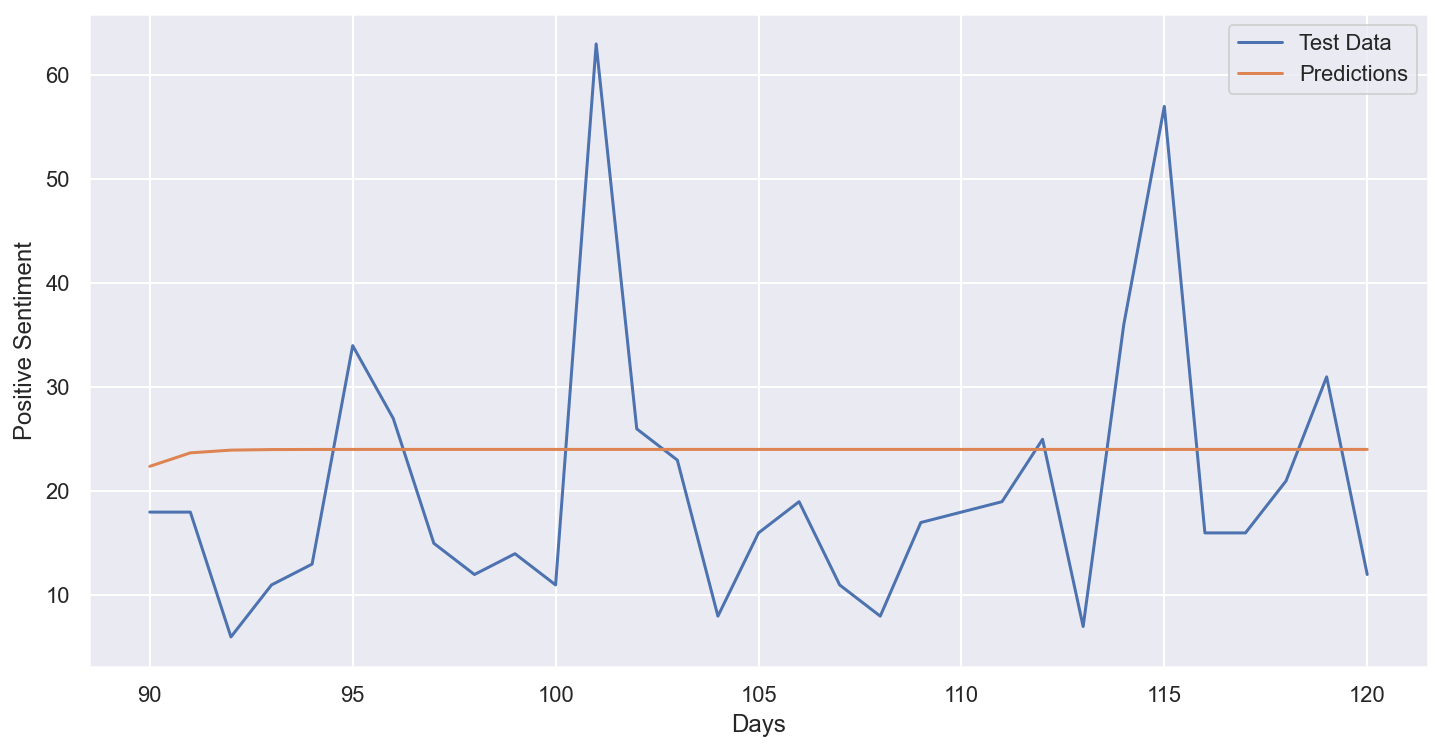

In [220]:
#Plot the graph of the Test Data vs Predictions 
plt.figure(figsize=(12,6))
#sns.set(font_scale=1)

plt.plot(test)
plt.plot(predictions)
plt.legend(('Test Data','Predictions'))
plt.xlabel("Days")
plt.ylabel("Positive Sentiment")

In [221]:
#Calculate Root Mean Squared error
print(f'Root Mean Squared error is: {round(np.sqrt(np.mean(residuals**2)),2)}')

Root Mean Squared error is: 13.36


### Auto ARMA paramaters

In [222]:
#copy pos df
paramaters = pos.copy()

#Drop date column 
paramaters.drop(['date'], axis=1,inplace=True)

#Set the size of the training data and test data. 
#train = paramaters[0:334]
#test = paramaters[335:365]

train = paramaters[0:275]
test = paramaters[276:365]

#train = paramaters[0:365]

#Convert dataframes to a series  
train = train.squeeze()
test = test.squeeze()

In [223]:
#Find the best hyperparamaters
model = pm.auto_arima(train, start_p=1, start_q=1,
                      test='adf',
                      max_p=22, max_q=14,
                      m=1,             
                      d=1,          
                      seasonal=False,   
                      start_P=0, 
                      D=None, 
                      max_order = 400,
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=False)

modelFit = model.fit(train)

#Print Model Results
print(modelFit.summary())

 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=4065.181, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=3930.941, Time=0.07 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=3928.675, Time=0.15 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=3930.530, Time=0.19 sec
 ARIMA(0,1,4)(0,0,0)[0] intercept   : AIC=3929.612, Time=0.26 sec
 ARIMA(0,1,5)(0,0,0)[0] intercept   : AIC=3928.438, Time=0.38 sec
 ARIMA(0,1,6)(0,0,0)[0] intercept   : AIC=3929.611, Time=0.45 sec
 ARIMA(0,1,7)(0,0,0)[0] intercept   : AIC=3910.708, Time=0.51 sec
 ARIMA(0,1,8)(0,0,0)[0] intercept   : AIC=3857.412, Time=0.57 sec
 ARIMA(0,1,9)(0,0,0)[0] intercept   : AIC=3858.472, Time=0.70 sec
 ARIMA(0,1,10)(0,0,0)[0] intercept   : AIC=3860.421, Time=0.72 sec
 ARIMA(0,1,11)(0,0,0)[0] intercept   : AIC=3861.059, Time=0.83 sec
 ARIMA(0,1,12)(0,0,0)[0] intercept   : AIC=3863.372, Time=0.89 sec
 ARIMA(0,1,13)(0,0,0)[0] intercept   : AIC=3881.538, Time=1.09 sec
 ARIMA(0,1,14)(0,0,0)[0] intercept   : AIC=inf, Time=1.13 sec
 ARIMA(1,1

 ARIMA(8,1,5)(0,0,0)[0] intercept   : AIC=inf, Time=0.88 sec
 ARIMA(8,1,6)(0,0,0)[0] intercept   : AIC=inf, Time=0.89 sec
 ARIMA(8,1,7)(0,0,0)[0] intercept   : AIC=3860.755, Time=0.91 sec
 ARIMA(8,1,8)(0,0,0)[0] intercept   : AIC=3859.971, Time=1.04 sec
 ARIMA(8,1,9)(0,0,0)[0] intercept   : AIC=3861.984, Time=1.14 sec
 ARIMA(8,1,10)(0,0,0)[0] intercept   : AIC=3862.102, Time=1.22 sec
 ARIMA(8,1,11)(0,0,0)[0] intercept   : AIC=3864.472, Time=1.39 sec
 ARIMA(8,1,12)(0,0,0)[0] intercept   : AIC=3867.459, Time=1.54 sec
 ARIMA(8,1,13)(0,0,0)[0] intercept   : AIC=3867.351, Time=1.77 sec
 ARIMA(8,1,14)(0,0,0)[0] intercept   : AIC=inf, Time=1.85 sec
 ARIMA(9,1,0)(0,0,0)[0] intercept   : AIC=3853.859, Time=0.16 sec
 ARIMA(9,1,1)(0,0,0)[0] intercept   : AIC=3849.955, Time=0.68 sec
 ARIMA(9,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.82 sec
 ARIMA(9,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.87 sec
 ARIMA(9,1,4)(0,0,0)[0] intercept   : AIC=inf, Time=0.87 sec
 ARIMA(9,1,5)(0,0,0)[0] intercept  

 ARIMA(16,1,12)(0,0,0)[0] intercept   : AIC=3874.275, Time=2.58 sec
 ARIMA(16,1,13)(0,0,0)[0] intercept   : AIC=3877.155, Time=2.63 sec
 ARIMA(16,1,14)(0,0,0)[0] intercept   : AIC=inf, Time=2.71 sec
 ARIMA(17,1,0)(0,0,0)[0] intercept   : AIC=3864.237, Time=0.94 sec
 ARIMA(17,1,1)(0,0,0)[0] intercept   : AIC=3863.045, Time=1.67 sec
 ARIMA(17,1,2)(0,0,0)[0] intercept   : AIC=3861.995, Time=1.81 sec
 ARIMA(17,1,3)(0,0,0)[0] intercept   : AIC=3864.308, Time=2.04 sec
 ARIMA(17,1,4)(0,0,0)[0] intercept   : AIC=3863.734, Time=1.99 sec
 ARIMA(17,1,5)(0,0,0)[0] intercept   : AIC=3863.997, Time=2.01 sec
 ARIMA(17,1,6)(0,0,0)[0] intercept   : AIC=3867.594, Time=2.16 sec
 ARIMA(17,1,7)(0,0,0)[0] intercept   : AIC=3867.037, Time=2.25 sec
 ARIMA(17,1,8)(0,0,0)[0] intercept   : AIC=3867.453, Time=2.33 sec
 ARIMA(17,1,9)(0,0,0)[0] intercept   : AIC=3870.409, Time=2.59 sec
 ARIMA(17,1,10)(0,0,0)[0] intercept   : AIC=inf, Time=2.66 sec
 ARIMA(17,1,11)(0,0,0)[0] intercept   : AIC=3872.108, Time=2.69 sec


#### ARIMA

In [224]:
#copy pos df
arima = pos.copy()

#Drop date column 
arima.drop(['date'], axis=1,inplace=True)

#Set the size of the training data and test data. Test at 90 days
train = arima[0:275]
test = arima[275:365]


#Convert dataframes to a series  
train = train.squeeze()
test = test.squeeze()

In [225]:
model = ARIMA(train, order=(6,1,1))


#Estimate the model parameters 
modelFit = model.fit()

#Print Model Results
print(modelFit.summary())


                               SARIMAX Results                                
Dep. Variable:              sentiment   No. Observations:                  275
Model:                 ARIMA(6, 1, 1)   Log Likelihood               -1915.879
Date:                Thu, 25 May 2023   AIC                           3847.758
Time:                        09:20:34   BIC                           3876.663
Sample:                             0   HQIC                          3859.359
                                - 275                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9127      0.092     -9.934      0.000      -1.093      -0.733
ar.L2         -0.8214      0.110     -7.468      0.000      -1.037      -0.606
ar.L3         -0.7598      0.121     -6.273      0.0

In [226]:
#Examine accuracy of model
#Set parameters for start and end predictions
predictionStart = test.index[0]
predictionEnd = test.index[-1]

#Call the model to make predictions
predictions = modelFit.predict(start=predictionStart, end=predictionEnd)

#Difference between test and predictions
residuals = test - predictions

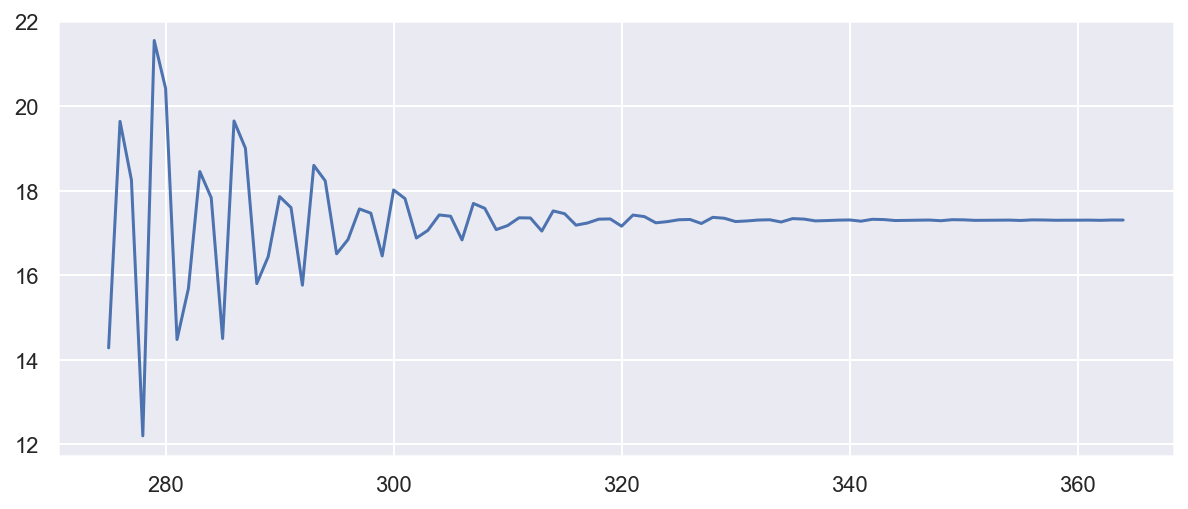

In [227]:
#Plot the pattern of the predictions
plt.figure(figsize=(10,4))
sns.set(font_scale=1)
plt.plot(predictions)

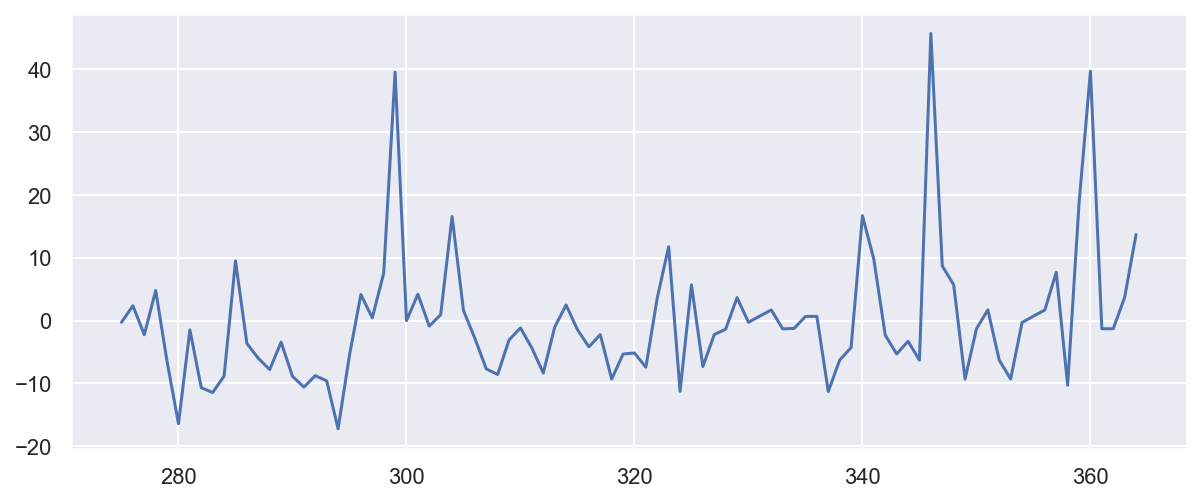

In [228]:
#Plot the pattern of the residuals
plt.figure(figsize=(10,4))
sns.set(font_scale=1)
plt.plot(residuals)

Text(0, 0.5, 'Positive Sentiment')

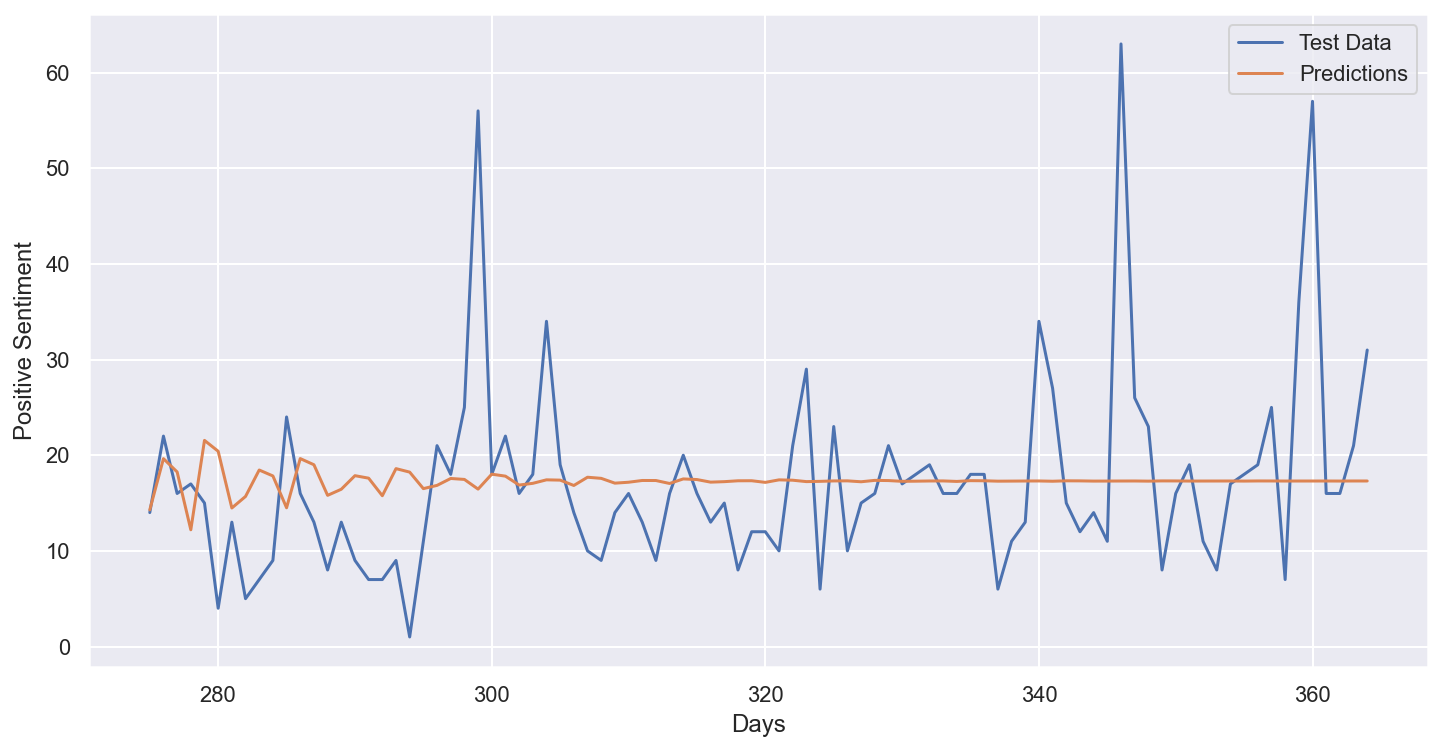

In [229]:
#Plot the graph of the Test Data vs Predictions 
plt.figure(figsize=(12,6))
#sns.set(font_scale=1)

plt.plot(test)
plt.plot(predictions)
plt.legend(('Test Data','Predictions'))

plt.xlabel("Days")
plt.ylabel("Positive Sentiment")

In [230]:
#Calculate Root Mean Squared error
print(f'Root Mean Squared error is: {round(np.sqrt(np.mean(residuals**2)),2)}')

Root Mean Squared error is: 10.39


### Make Predictions for the future (first 3 months 2017)

### predictions for positive sentiment

In [231]:
#copy pos df
arima = pos.copy()

#Drop date column 
arima.drop(['date'], axis=1,inplace=True)


#Set the size of the training data and test data. 
train = arima[0:365]

#Convert dataframes to a series  
train = train.squeeze()

model = ARIMA(train, order=(6,1,1))


#Estimate the model parameters 
modelFit = model.fit()

#Print Model Results
print(modelFit.summary())

                               SARIMAX Results                                
Dep. Variable:              sentiment   No. Observations:                  365
Model:                 ARIMA(6, 1, 1)   Log Likelihood               -2493.068
Date:                Thu, 25 May 2023   AIC                           5002.136
Time:                        09:20:35   BIC                           5033.313
Sample:                             0   HQIC                          5014.528
                                - 365                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9132      0.069    -13.265      0.000      -1.048      -0.778
ar.L2         -0.8225      0.083     -9.878      0.000      -0.986      -0.659
ar.L3         -0.7615      0.092     -8.285      0.0

In [232]:
predictionStart = 366
predictionEnd = 455

#Call the model to make predictions
positive_predictions = modelFit.predict(start=predictionStart, end=predictionEnd)

### predictions for negative sentiment

In [233]:

arima = neg.copy()

#Drop date column 
arima.drop(['date'], axis=1,inplace=True)


#Set the size of the training data and test data. 
train = arima[0:365]

#Convert dataframes to a series  
train = train.squeeze()

model = ARIMA(train, order=(6,1,1))


#Estimate the model parameters 
modelFit = model.fit()

#Print Model Results
print(modelFit.summary())

                               SARIMAX Results                                
Dep. Variable:              sentiment   No. Observations:                  365
Model:                 ARIMA(6, 1, 1)   Log Likelihood               -2396.911
Date:                Thu, 25 May 2023   AIC                           4809.822
Time:                        09:20:35   BIC                           4841.000
Sample:                             0   HQIC                          4822.214
                                - 365                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9202      0.065    -14.216      0.000      -1.047      -0.793
ar.L2         -0.8436      0.076    -11.086      0.000      -0.993      -0.694
ar.L3         -0.7966      0.083     -9.624      0.0

In [234]:
predictionStart = 366
predictionEnd = 455

#Call the model to make predictions
negative_predictions = modelFit.predict(start=predictionStart, end=predictionEnd)

### predictions for neutral sentiment

In [235]:
arima = neut.copy()

#Drop date column 
arima.drop(['date'], axis=1,inplace=True)


#Set the size of the training data and test data. 
train = arima[0:365]

#Convert dataframes to a series  
train = train.squeeze()

model = ARIMA(train, order=(6,1,1))


#Estimate the model parameters 
modelFit = model.fit()

#Print Model Results
print(modelFit.summary())

                               SARIMAX Results                                
Dep. Variable:              sentiment   No. Observations:                  365
Model:                 ARIMA(6, 1, 1)   Log Likelihood               -2888.399
Date:                Thu, 25 May 2023   AIC                           5792.798
Time:                        09:20:35   BIC                           5823.975
Sample:                             0   HQIC                          5805.189
                                - 365                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9197      0.074    -12.496      0.000      -1.064      -0.775
ar.L2         -0.8291      0.078    -10.639      0.000      -0.982      -0.676
ar.L3         -0.7633      0.082     -9.291      0.0

In [236]:
predictionStart = 366
predictionEnd = 455

#Call the model to make predictions
neutral_predictions = modelFit.predict(start=predictionStart, end=predictionEnd)

In [237]:
#Rename colunms to something more meaningful for merge
pos = pos.rename(columns={'sentiment': 'positive' }) 
neg = neg.rename(columns={'sentiment': 'negative' }) 
neut = neut.rename(columns={'sentiment': 'neutral' }) 

In [238]:
#Create DF with dates for 2017 that we will predict
date_rng = pd.date_range('2017-01-01', periods=90, freq='D')
new_dates = pd.DataFrame({ 'date': date_rng }) 


In [239]:
#merge positive and negative dataframes
sentiment = pd.merge(pos,neut,how='left')

In [240]:
sentiment = pd.merge(sentiment,neg,how='left')

In [241]:
#Add futerdates to dataframe
sentiment = pd.concat([sentiment,new_dates],axis=0, join='outer')

In [242]:
#reset index to be sequence
sentiment.reset_index(drop=True, inplace=True)


In [243]:
#Insert the forcasted values to the end of the dataframe
for i in range (366, 456):    
    sentiment.iat[i,1] = positive_predictions[i]
    
for i in range (366, 456):    
    sentiment.iat[i,2] = neutral_predictions[i]
    
for i in range (366, 456):    
    sentiment.iat[i,3] = negative_predictions[i]
    


In [244]:
sentiment = sentiment.round(decimals = 0)

In [245]:
#Date conversion section

#Add a month value to the dataframe
sentiment['year'] = sentiment['date'].dt.year

#Add a month value to the dataframe
sentiment['month'] = sentiment['date'].dt.month

In [246]:

fig = px.line(sentiment, x='date', y=['positive','negative','neutral'], 
              title = "GoT Sentiment",
              labels={
                     "date": "Date",
                     "variable": "Sentiment"
                 },
             )


fig.update_layout(font=dict(family="Courier New, monospace",size=12,color="RebeccaPurple"), yaxis_title= "Sentiment")


fig.show()

In [247]:
sentiment.groupby(['year','month'], as_index=False)['neutral'].sum()


,year,month,neutral
0,2016,1,1835.0
1,2016,2,1144.0
2,2016,3,1303.0
3,2016,4,12456.0
4,2016,5,21644.0
5,2016,6,31639.0
6,2016,7,5846.0
7,2016,8,3007.0
8,2016,9,2077.0
9,2016,10,1444.0


In [248]:

fig = px.bar(sentiment, x='date', y=['positive','negative','neutral'], title = "GoT Sentiment",barmode='group')

fig.show()

In [249]:
#Dashboard will use this ccv file
sentiment.to_csv('C:\\dash\\GoT Sentiment.csv')

In [250]:
fig = px.histogram(sentiment, x='date', nbins=20, y=['positive','negative','neutral'],width=1000, height=650,
                    title = "GoT Sentiment",barmode='group',
                    labels={
                     "date": "Month",
                     "variable": "Sentiment"
                 },
                  
                  )


fig.update_layout(font=dict(family="Courier New, monospace",size=12,color="RebeccaPurple"), yaxis_title= "Sentiment")
    
    
fig.show()

